In [2]:
# Library imports (see /Utilities/setup_env.py for full import list and figure setup)

from pathlib import Path
import sys

repo_root = Path.cwd().parents[1]  # .../Figure_analysis
repo_root = repo_root.parent       # repo root
sys.path.insert(0, str(repo_root))

from Figure_analysis.Utilities.setup_env import *

In [15]:
# Define color map

colors = ["#0f4c5c", "#ecf39e", "#9a031e"]
custom_cmap = LinearSegmentedColormap.from_list("black_blue_gold", colors)


def get_text_color(rgb, threshold=0.5):
    r, g, b = rgb[:3]  # RGB tuple between 0 and 1
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return 'white' if luminance < threshold else 'black'

def plot_structure_data(df_toplot, figsize, out_file = ''):
    fig, ax = plt.subplots(figsize=figsize)

    for i, row in df_toplot.iterrows():
        x, y = row['x'], row['y']
        base = row['nt']
        dG = row['dG']
        
        if dG == -999:
            facecolor = '0.9'
            edgecolor = None
            textcolor = 'gray'
        else:
            # Optional: use a colormap for continuous dG coloring
            # Here we map dG from blue (stable) to red (unstable)

            norm = mcolors.Normalize(vmin=-1,
                                        vmax=4)
            cmap = plt.get_cmap('magma_r')
            cmap = custom_cmap
            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            facecolor = cmap(norm(dG))
            edgecolor = 'black'
            textcolor = get_text_color(facecolor)

        ax.scatter(x, y, s=300, facecolors=facecolor, edgecolors=edgecolor, linewidths=1)
        ax.annotate(f"{base}", (x, y), fontsize=12, ha='center', va='center', color=textcolor, fontweight='bold')

    ax.axis('equal')
    ax.grid(False)
    ax.axis('off')

    fig.colorbar(sm, ax=ax, orientation='vertical', label='ΔG (kcal/mol)')
    plt.savefig(out_file, bbox_inches='tight')
    plt.show()

In [23]:
# Mapping of HIV sites to dG data sites
hiv_sites_dict = {
    1: 2,
    2: 3,
    5: 19,
    6: 20,
    7: 21,
    8: 22,
    9: 23,
    10: 24,
    11: 25,
    12: 26,
    13: 27,
    14: 28,
    15: 29,
    16: 30, 
    17: 31, 
    18: 32,
    19: 33,
    20: 34,
    21: 35,
    22: 36,
    23: 37,
    24: 38,
    25: 39,
    26: 40,
    27: 41,
    28: 42,
    29: 43,
    30: 44,
    31: 45,
    32: 61,
    33: 62,
    34: 63,
    35: 64
}

In [29]:
# Prepare data
dG_data = pd.read_csv('../HIV_dG_Barplot/hiv_dG_values_25C.csv')

df_WT = pd.read_csv('RNApuzzler_coords/hiv_WT.csv')
df_WT.reset_index(inplace=True)
df_WT['site'] = df_WT['index'].map(hiv_sites_dict)
dG_WT = dG_data[dG_data['construct'] == 'hiv_wt'][['site_num', 'dG']]

# Merge on df_WT and df_A8C which contains all sites
df_WT = df_WT.merge(dG_WT[['site_num', 'dG']], left_on='site', right_on = 'site_num', how='left')
df_WT['dG'] = df_WT['dG'].fillna(-999) # this is for sites with no data

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


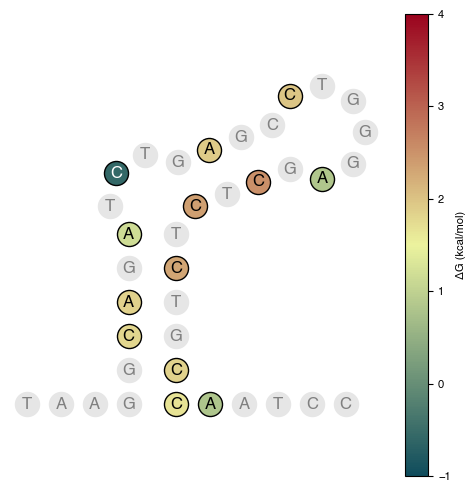

In [30]:
plot_structure_data(df_WT, (6,6), 'hiv_wt.pdf')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


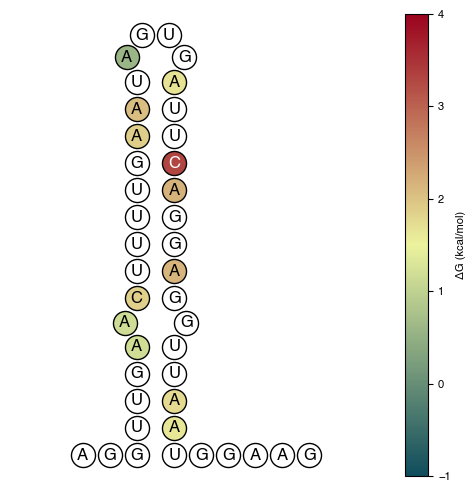

In [ ]:
plot_structure_data(df_WT, (6,6), 'fourU_WT.pdf')